<a href="https://colab.research.google.com/github/SahajTC/Augmented-Financial-Intelligence/blob/main/Model_training_on_fake_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import yfinance as yf
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor


In [2]:
pip install yfinance prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [62]:
data = yf.download(tickers='BTC-USD', start='2015-01-01', end='2022-11-30', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [63]:
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [64]:
df = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
df.head()

,ds,y
0,2015-01-01,314.248993
1,2015-01-02,315.032013
2,2015-01-03,281.082001
3,2015-01-04,264.195007
4,2015-01-05,274.473999


In [65]:
df.shape

(2890, 2)

In [66]:
sampl=np.random.uniform(low=2,high=5,size=(2890,))

In [12]:
sampl=np.random.uniform(low=0,high=2,size=(2890,))

In [14]:
sampl=np.random.uniform(low=5,high=10,size=(2890,))

In [16]:
sampl=np.random.uniform(low=10,high=15,size=(2890,))

In [18]:
sampl=np.random.uniform(low=15,high=25,size=(2890,))

In [10]:
sampl

array([3.95196768, 3.66745148, 3.16679967, ..., 3.71951603, 4.64285636,
       4.51562766])

In [67]:
sampl1=np.random.uniform(low=2,high=5,size=(2890,))
sampl2=np.random.uniform(low=0,high=2,size=(2890,))
sampl3=np.random.uniform(low=5,high=10,size=(2890,))
sampl4=np.random.uniform(low=10,high=15,size=(2890,))
sampl5=np.random.uniform(low=15,high=25,size=(2890,))
sampl6=np.random.uniform(low=25,high=35,size=(2890,))

In [68]:
df["2-5"]=sampl1

In [69]:
df["0-2"]=sampl2

In [70]:
df["5-10"]=sampl3

In [71]:
df["10-15"]=sampl4

In [72]:
df["15-25"]=sampl5

In [73]:
df["25-35"]=sampl6

In [74]:
df.head()

,ds,y,2-5,0-2,5-10,10-15,15-25,25-35
0,2015-01-01,314.248993,2.486452,0.285784,5.635265,12.857202,19.901217,30.048448
1,2015-01-02,315.032013,3.827205,0.852817,5.954754,11.391029,24.184761,27.023967
2,2015-01-03,281.082001,2.879668,1.947414,7.170881,10.851600,17.794542,30.509024
3,2015-01-04,264.195007,3.520342,0.723120,8.635297,10.961650,20.160288,27.501795
4,2015-01-05,274.473999,4.223718,0.747009,5.887459,10.176974,19.119144,34.296134


In [75]:
df["2-5"]=df["2-5"]/100

In [76]:
df["0-2"]=df["0-2"]/100
df["5-10"]=df["5-10"]/100
df["10-15"]=df["10-15"]/100
df["15-25"]=df["15-25"]/100
df["25-35"]=df["25-35"]/100

In [77]:
df["2-5"]=df["2-5"]+1

In [78]:
df["0-2"]=df["0-2"]+1
df["5-10"]=df["5-10"]+1
df["10-15"]=df["10-15"]+1
df["15-25"]=df["15-25"]+1
df["25-35"]=df["25-35"]+1

In [79]:
df.head()

,ds,y,2-5,0-2,5-10,10-15,15-25,25-35
0,2015-01-01,314.248993,1.024865,1.002858,1.056353,1.128572,1.199012,1.300484
1,2015-01-02,315.032013,1.038272,1.008528,1.059548,1.113910,1.241848,1.270240
2,2015-01-03,281.082001,1.028797,1.019474,1.071709,1.108516,1.177945,1.305090
3,2015-01-04,264.195007,1.035203,1.007231,1.086353,1.109616,1.201603,1.275018
4,2015-01-05,274.473999,1.042237,1.007470,1.058875,1.101770,1.191191,1.342961


In [80]:
result = df[["0-2", "2-5","5-10","10-15","15-25","25-35"]].multiply(df["y"], axis="index")

In [81]:
result.head()

,0-2,2-5,5-10,10-15,15-25,25-35
0,315.147067,322.062644,331.957756,354.652621,376.788368,408.675937
1,317.718660,327.088933,333.791393,350.917400,391.221752,400.166162
2,286.555830,289.176230,301.238056,311.583896,331.099255,366.837377
3,266.105454,273.495576,287.009031,293.155139,317.457483,336.853375
4,276.524345,286.067008,290.633544,302.407146,326.951078,368.607968


In [82]:
df["0-2"]=result["0-2"]

In [83]:
df["2-5"]=result["2-5"]
df["10-15"]=result["10-15"]
df["5-10"]=result["5-10"]
df["15-25"]=result["15-25"]
df["25-35"]=result["25-35"]

In [84]:
df_tmp=df

In [61]:
df.drop("ds",inplace=True,axis=1)
df.head()

,y,2-5,0-2,5-10,10-15,15-25,25-35
0,314.248993,321.071115,316.920122,343.342131,356.057341,370.510850,413.175972
1,315.032013,330.436511,319.995297,346.511080,350.400125,379.337363,415.125201
2,281.082001,292.923702,283.523548,302.788051,319.584206,326.015200,354.900545
3,264.195007,274.716912,268.625390,284.674580,293.233429,317.301866,332.607251
4,274.473999,282.035407,274.493431,299.621011,308.918366,334.079490,364.029193


In [85]:
df_train = df[df['ds']<='2020-7-30']
df_test = df[df['ds']>'2022-10-30']


In [86]:
df_train.drop("ds",inplace=True,axis=1)
df_test.drop("ds",inplace=True,axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [87]:
df_train.head()

,y,2-5,0-2,5-10,10-15,15-25,25-35
0,314.248993,322.062644,315.147067,331.957756,354.652621,376.788368,408.675937
1,315.032013,327.088933,317.718660,333.791393,350.917400,391.221752,400.166162
2,281.082001,289.176230,286.555830,301.238056,311.583896,331.099255,366.837377
3,264.195007,273.495576,266.105454,287.009031,293.155139,317.457483,336.853375
4,274.473999,286.067008,276.524345,290.633544,302.407146,326.951078,368.607968


In [89]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(df_train.drop("y", axis=1), df_train.y)

RandomForestRegressor(n_jobs=-1)

In [90]:
X_train=df_train.drop("y", axis=1)
y_train=df_train.y
X_test=df_test.drop("y",axis=1)
y_test=df_test.y

In [98]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,mean_absolute_percentage_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Testing MAE": mean_absolute_error(y_test, test_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Test RMSLE": rmsle(y_test, test_preds),
              "Training R^2": model.score(X_train, y_train),
              "Test R^2": model.score(X_test, y_test),
              "Training MAPE": mean_absolute_percentage_error(y_train, train_preds),
              "Testing MAPE": mean_absolute_percentage_error(y_test, test_preds),}
    return scores


In [93]:
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=2000)

In [94]:
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=2000, n_jobs=-1)

In [185]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [2000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=500,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2500 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 385, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 111, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samp

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=500,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [2000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [186]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 14,
 'min_samples_leaf': 11,
 'max_samples': 2000,
 'max_features': 'auto',
 'max_depth': 5}

In [171]:
show_scores(model)

{'Training MAE': 7.411740699071768,
 'Testing MAE': 436.6052757161463,
 'Training RMSLE': 0.002394975988741057,
 'Test RMSLE': 0.03660316908977317,
 'Training R^2': 0.9999896561207915,
 'Test R^2': 0.8441797832984642,
 'Training MAPE': 0.0017286422157259175,
 'Testing MAPE': 0.021923308024785128}

In [189]:
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=5,
                                    min_samples_split=8,
                                    max_features='auto',
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=5, min_samples_split=8, n_estimators=40,
                      n_jobs=-1)

In [190]:
show_scores(ideal_model)

{'Training MAE': 18.28829446348571,
 'Testing MAE': 867.5131533383749,
 'Training RMSLE': 0.006866001203369595,
 'Test RMSLE': 0.07148650846073801,
 'Training R^2': 0.9997973392951311,
 'Test R^2': 0.44579214584695903,
 'Training MAPE': 0.0038735818243333816,
 'Testing MAPE': 0.0438933692546773}

In [191]:
ideal_model.feature_importances_

array([0.27790347, 0.34264119, 0.08984668, 0.02701259, 0.09401923,
       0.16857684])

In [192]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

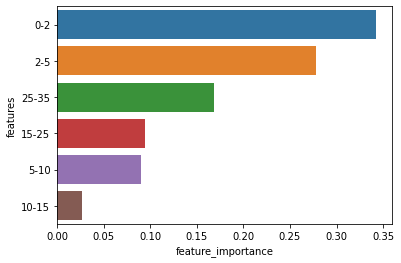

In [193]:
plot_features(X_train.columns, ideal_model.feature_importances_)